In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import tensorflow as tf

import os
import sys
import time

from tensorflow import keras



In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
dir(housing)
print(housing.DESCR)
print("=" * 100)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
from sklearn.model_selection import train_test_split

# default test_size is 0.25
x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state=7
)

x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state=11
)

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)


In [5]:
# RandomizerdSearchCV
# 1. 转化为sklearn的model
# 2. 定义参数集合
# 3. 搜索参数

def build_model(
    hidden_layer=1, layer_size=30, learning_rate=3e-3
):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(layer_size, activation="relu", input_shape=x_train.shape[1:]))
    
    for _ in range(hidden_layer - 1):
        model.add(keras.layers.Dense(layer_size, activation="relu"))
        
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

    
callbacks = [
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)
]

sklearn_model = keras.wrappers.scikit_learn.KerasRegressor(build_model)
history = sklearn_model.fit(x_train_scaled, y_train, epochs=100, validation_data=(x_valid_scaled, y_valid), callbacks=callbacks)



Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 2s 150us/sample - loss: 1.3127 - val_loss: 0.8214
Epoch 2/100
11610/11610 [==============================] - 1s 63us/sample - loss: 0.6719 - val_loss: 0.6183
Epoch 3/100
11610/11610 [==============================] - 1s 72us/sample - loss: 0.5508 - val_loss: 0.5682
Epoch 4/100
11610/11610 [==============================] - 1s 52us/sample - loss: 0.5159 - val_loss: 0.5331
Epoch 5/100
11610/11610 [==============================] - 1s 48us/sample - loss: 0.4955 - val_loss: 0.5092
Epoch 6/100
11610/11610 [==============================] - 1s 50us/sample - loss: 0.4736 - val_loss: 0.4977
Epoch 7/100
11610/11610 [==============================] - 1s 49us/sample - loss: 0.4618 - val_loss: 0.5053
Epoch 8/100
11610/11610 [==============================] - 1s 49us/sample - loss: 0.4531 - val_loss: 0.4720
Epoch 9/100
11610/11610 [==============================] - 1s 53us/sample - loss: 0.45

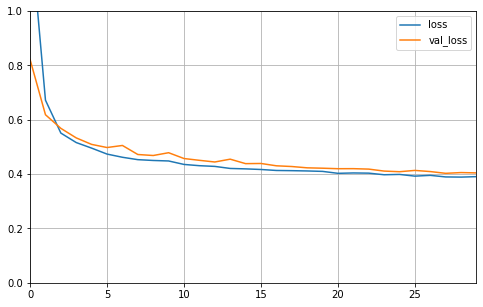

In [6]:
def plot_learning_curve(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curve(history)

In [9]:
reciprocal.rvs(1e-4, 1e-2 , size=10)

array([0.0001834 , 0.00014682, 0.00274049, 0.0027374 , 0.00671706,
       0.00019448, 0.0016977 , 0.00111644, 0.00071905, 0.00022961])

In [7]:
from scipy.stats import reciprocal

# 分布函数 f(x) = 1 / (x * log(b/a)) a <= x <= b

param_distribution = {
    "hidden_layer": [1, 2, 3, 4],
    "layer_size": np.arange(1, 100),
    "learning_rate": reciprocal(1e-4, 1e-2)
}

from sklearn.model_selection import RandomizedSearchCV

# cv默认等于3

random_search_cv = RandomizedSearchCV(
    sklearn_model, param_distribution, n_iter=10, n_jobs=1, cv=3
)

random_search_cv.fit(x_train_scaled, y_train, epochs=10, validation_data=(x_valid_scaled, y_valid), callbacks=callbacks)

# cross validation

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 120us/sample - loss: 1.7920 - val_loss: 0.8647
Epoch 2/10
7740/7740 [==============================] - 0s 59us/sample - loss: 0.7256 - val_loss: 0.6633
Epoch 3/10
7740/7740 [==============================] - 0s 57us/sample - loss: 0.6032 - val_loss: 0.6016
Epoch 4/10
7740/7740 [==============================] - 0s 62us/sample - loss: 0.5575 - val_loss: 0.5643
Epoch 5/10
7740/7740 [==============================] - 0s 59us/sample - loss: 0.5263 - val_loss: 0.5371
Epoch 6/10
7740/7740 [==============================] - 1s 74us/sample - loss: 0.5047 - val_loss: 0.5176
Epoch 7/10
7740/7740 [==============================] - 0s 56us/sample - loss: 0.4882 - val_loss: 0.5004
Epoch 8/10
7740/7740 [==============================] - 1s 81us/sample - loss: 0.4768 - val_loss: 0.4887
Epoch 9/10
7740/7740 [==============================] - 1s 81us/sample - loss: 0.4678 - val_loss: 0.4786
Epoch 

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 147us/sample - loss: 1.6453 - val_loss: 0.9284
Epoch 2/10
7740/7740 [==============================] - 1s 83us/sample - loss: 0.7362 - val_loss: 0.7346
Epoch 3/10
7740/7740 [==============================] - 1s 97us/sample - loss: 0.6479 - val_loss: 0.6757
Epoch 4/10
7740/7740 [==============================] - 1s 86us/sample - loss: 0.6030 - val_loss: 0.6340
Epoch 5/10
7740/7740 [==============================] - 1s 75us/sample - loss: 0.5680 - val_loss: 0.6013
Epoch 6/10
7740/7740 [==============================] - 1s 83us/sample - loss: 0.5404 - val_loss: 0.5750
Epoch 7/10
7740/7740 [==============================] - 1s 95us/sample - loss: 0.5178 - val_loss: 0.5499
Epoch 8/10
7740/7740 [==============================] - 1s 84us/sample - loss: 0.4995 - val_loss: 0.5324
Epoch 9/10
7740/7740 [==============================] - 1s 93us/sample - loss: 0.4845 - val_loss: 0.5161
Epoch 

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 165us/sample - loss: 2.1340 - val_loss: 0.9065
Epoch 2/10
7740/7740 [==============================] - 0s 63us/sample - loss: 0.7351 - val_loss: 0.7316
Epoch 3/10
7740/7740 [==============================] - 1s 66us/sample - loss: 0.6431 - val_loss: 0.6888
Epoch 4/10
7740/7740 [==============================] - 0s 63us/sample - loss: 0.6058 - val_loss: 0.6563
Epoch 5/10
7740/7740 [==============================] - 1s 72us/sample - loss: 0.5766 - val_loss: 0.6294
Epoch 6/10
7740/7740 [==============================] - 1s 66us/sample - loss: 0.5531 - val_loss: 0.6031
Epoch 7/10
7740/7740 [==============================] - 0s 58us/sample - loss: 0.5312 - val_loss: 0.5800
Epoch 8/10
7740/7740 [==============================] - 0s 64us/sample - loss: 0.5139 - val_loss: 0.5624
Epoch 9/10
7740/7740 [==============================] - 0s 61us/sample - loss: 0.4984 - val_loss: 0.5447
Epoch 

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 93us/sample - loss: 1.0481 - val_loss: 0.6908
Epoch 2/10
7740/7740 [==============================] - 0s 57us/sample - loss: 0.6153 - val_loss: 0.5984
Epoch 3/10
7740/7740 [==============================] - 0s 62us/sample - loss: 0.6534 - val_loss: 0.5556
Epoch 4/10
7740/7740 [==============================] - 0s 56us/sample - loss: 0.5352 - val_loss: 0.4991
Epoch 5/10
7740/7740 [==============================] - 0s 54us/sample - loss: 0.4699 - val_loss: 0.4763
Epoch 6/10
7740/7740 [==============================] - 0s 59us/sample - loss: 0.4594 - val_loss: 0.4686
Epoch 7/10
7740/7740 [==============================] - 0s 56us/sample - loss: 0.4462 - val_loss: 0.4561
Epoch 8/10
7740/7740 [==============================] - 1s 69us/sample - loss: 0.4382 - val_loss: 0.4484
Epoch 9/10
7740/7740 [==============================] - 0s 54us/sample - loss: 0.4296 - val_loss: 0.4409
Epoch 1

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 113us/sample - loss: 0.9975 - val_loss: 0.6466
Epoch 2/10
7740/7740 [==============================] - 0s 52us/sample - loss: 0.7453 - val_loss: 0.6871
Epoch 3/10
7740/7740 [==============================] - 0s 53us/sample - loss: 0.7597 - val_loss: 0.5049
Epoch 4/10
7740/7740 [==============================] - 0s 55us/sample - loss: 0.4596 - val_loss: 0.4770
Epoch 5/10
7740/7740 [==============================] - 0s 56us/sample - loss: 0.4433 - val_loss: 0.4673
Epoch 6/10
7740/7740 [==============================] - 0s 52us/sample - loss: 0.4315 - val_loss: 0.4544
Epoch 7/10
7740/7740 [==============================] - 0s 53us/sample - loss: 0.4223 - val_loss: 0.4444
Epoch 8/10
7740/7740 [==============================] - 0s 60us/sample - loss: 0.4153 - val_loss: 0.4397
Epoch 9/10
7740/7740 [==============================] - 0s 61us/sample - loss: 0.4105 - val_loss: 0.4326
Epoch 

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 91us/sample - loss: 1.1804 - val_loss: 0.7065
Epoch 2/10
7740/7740 [==============================] - 0s 64us/sample - loss: 0.5960 - val_loss: 0.5977
Epoch 3/10
7740/7740 [==============================] - 2s 211us/sample - loss: 0.5061 - val_loss: 0.5336
Epoch 4/10
7740/7740 [==============================] - 1s 67us/sample - loss: 0.4692 - val_loss: 0.5027
Epoch 5/10
7740/7740 [==============================] - 1s 77us/sample - loss: 0.4475 - val_loss: 0.4840
Epoch 6/10
7740/7740 [==============================] - 1s 68us/sample - loss: 0.4317 - val_loss: 0.4676
Epoch 7/10
7740/7740 [==============================] - 0s 61us/sample - loss: 0.4211 - val_loss: 0.4543
Epoch 8/10
7740/7740 [==============================] - 0s 63us/sample - loss: 0.4114 - val_loss: 0.4441
Epoch 9/10
7740/7740 [==============================] - 0s 61us/sample - loss: 0.4032 - val_loss: 0.4366
Epoch 

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 127us/sample - loss: 1.2687 - val_loss: 0.7223
Epoch 2/10
7740/7740 [==============================] - 0s 53us/sample - loss: 0.6994 - val_loss: 0.6765
Epoch 3/10
7740/7740 [==============================] - 0s 57us/sample - loss: 0.5915 - val_loss: 0.5862
Epoch 4/10
7740/7740 [==============================] - 0s 57us/sample - loss: 0.5397 - val_loss: 0.5518
Epoch 5/10
7740/7740 [==============================] - 0s 58us/sample - loss: 0.5107 - val_loss: 0.5220
Epoch 6/10
7740/7740 [==============================] - 0s 54us/sample - loss: 0.4911 - val_loss: 0.5049
Epoch 7/10
7740/7740 [==============================] - 0s 54us/sample - loss: 0.4744 - val_loss: 0.5023
Epoch 8/10
7740/7740 [==============================] - 0s 59us/sample - loss: 0.4658 - val_loss: 0.4816
Epoch 9/10
7740/7740 [==============================] - 0s 58us/sample - loss: 0.4589 - val_loss: 0.4706
Epoch 

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 95us/sample - loss: 1.3737 - val_loss: 0.7744
Epoch 2/10
7740/7740 [==============================] - 0s 58us/sample - loss: 0.7709 - val_loss: 0.7126
Epoch 3/10
7740/7740 [==============================] - 1s 71us/sample - loss: 0.6540 - val_loss: 0.7403
Epoch 4/10
7740/7740 [==============================] - 0s 57us/sample - loss: 0.5643 - val_loss: 0.5704
Epoch 5/10
7740/7740 [==============================] - 1s 76us/sample - loss: 0.5148 - val_loss: 0.5383
Epoch 6/10
7740/7740 [==============================] - 1s 74us/sample - loss: 0.4946 - val_loss: 0.5216
Epoch 7/10
7740/7740 [==============================] - 1s 77us/sample - loss: 0.4780 - val_loss: 0.5417
Epoch 8/10
7740/7740 [==============================] - 1s 80us/sample - loss: 0.4697 - val_loss: 0.4942
Epoch 9/10
7740/7740 [==============================] - 1s 77us/sample - loss: 0.4589 - val_loss: 0.4826
Epoch 1

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 171us/sample - loss: 1.3111 - val_loss: 0.8261
Epoch 2/10
7740/7740 [==============================] - 1s 72us/sample - loss: 0.6830 - val_loss: 0.7157
Epoch 3/10
7740/7740 [==============================] - 1s 81us/sample - loss: 0.6106 - val_loss: 0.6539
Epoch 4/10
7740/7740 [==============================] - 1s 89us/sample - loss: 0.5629 - val_loss: 0.5984
Epoch 5/10
7740/7740 [==============================] - 1s 87us/sample - loss: 0.5233 - val_loss: 0.5619
Epoch 6/10
7740/7740 [==============================] - 1s 85us/sample - loss: 0.4945 - val_loss: 0.5372
Epoch 7/10
7740/7740 [==============================] - 1s 81us/sample - loss: 0.4738 - val_loss: 0.5142
Epoch 8/10
7740/7740 [==============================] - 1s 97us/sample - loss: 0.4595 - val_loss: 0.4932
Epoch 9/10
7740/7740 [==============================] - 1s 78us/sample - loss: 0.4508 - val_loss: 0.4849
Epoch 

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 2s 220us/sample - loss: 2.1472 - val_loss: 1.1175
Epoch 2/10
7740/7740 [==============================] - 1s 111us/sample - loss: 0.8110 - val_loss: 0.7238
Epoch 3/10
7740/7740 [==============================] - 1s 104us/sample - loss: 0.6632 - val_loss: 0.6634
Epoch 4/10
7740/7740 [==============================] - 1s 101us/sample - loss: 0.6146 - val_loss: 0.6237
Epoch 5/10
7740/7740 [==============================] - 1s 104us/sample - loss: 0.5799 - val_loss: 0.5905
Epoch 6/10
7740/7740 [==============================] - 1s 102us/sample - loss: 0.5511 - val_loss: 0.5620
Epoch 7/10
7740/7740 [==============================] - 1s 99us/sample - loss: 0.5269 - val_loss: 0.5391
Epoch 8/10
7740/7740 [==============================] - 1s 98us/sample - loss: 0.5058 - val_loss: 0.5181
Epoch 9/10
7740/7740 [==============================] - 1s 83us/sample - loss: 0.4875 - val_loss: 0.5030
E

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 144us/sample - loss: 1.9531 - val_loss: 0.9941
Epoch 2/10
7740/7740 [==============================] - 1s 67us/sample - loss: 0.7954 - val_loss: 0.7615
Epoch 3/10
7740/7740 [==============================] - 1s 69us/sample - loss: 0.6575 - val_loss: 0.6808
Epoch 4/10
7740/7740 [==============================] - 1s 73us/sample - loss: 0.6137 - val_loss: 0.6435
Epoch 5/10
7740/7740 [==============================] - 1s 68us/sample - loss: 0.5827 - val_loss: 0.6151
Epoch 6/10
7740/7740 [==============================] - 1s 67us/sample - loss: 0.5558 - val_loss: 0.5888
Epoch 7/10
7740/7740 [==============================] - 1s 74us/sample - loss: 0.5323 - val_loss: 0.5651
Epoch 8/10
7740/7740 [==============================] - 1s 70us/sample - loss: 0.5130 - val_loss: 0.5445
Epoch 9/10
7740/7740 [==============================] - 1s 73us/sample - loss: 0.4956 - val_loss: 0.5288
Epoch 

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 130us/sample - loss: 2.4003 - val_loss: 1.1381
Epoch 2/10
7740/7740 [==============================] - 1s 70us/sample - loss: 0.8654 - val_loss: 0.7630
Epoch 3/10
7740/7740 [==============================] - 1s 83us/sample - loss: 0.6494 - val_loss: 0.6656
Epoch 4/10
7740/7740 [==============================] - 1s 123us/sample - loss: 0.5860 - val_loss: 0.6282
Epoch 5/10
7740/7740 [==============================] - 1s 100us/sample - loss: 0.5540 - val_loss: 0.6030
Epoch 6/10
7740/7740 [==============================] - 1s 96us/sample - loss: 0.5300 - val_loss: 0.5753
Epoch 7/10
7740/7740 [==============================] - 1s 100us/sample - loss: 0.5093 - val_loss: 0.5534
Epoch 8/10
7740/7740 [==============================] - 1s 104us/sample - loss: 0.4906 - val_loss: 0.5359
Epoch 9/10
7740/7740 [==============================] - 1s 104us/sample - loss: 0.4762 - val_loss: 0.5179
E

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 169us/sample - loss: 1.2945 - val_loss: 0.7524
Epoch 2/10
7740/7740 [==============================] - 1s 96us/sample - loss: 0.6362 - val_loss: 0.6259
Epoch 3/10
7740/7740 [==============================] - 1s 95us/sample - loss: 0.5666 - val_loss: 0.5659
Epoch 4/10
7740/7740 [==============================] - 1s 94us/sample - loss: 0.5188 - val_loss: 0.5212
Epoch 5/10
7740/7740 [==============================] - 1s 110us/sample - loss: 0.4899 - val_loss: 0.4955
Epoch 6/10
7740/7740 [==============================] - 1s 82us/sample - loss: 0.4626 - val_loss: 0.4660
Epoch 7/10
7740/7740 [==============================] - 1s 95us/sample - loss: 0.4471 - val_loss: 0.4500
Epoch 8/10
7740/7740 [==============================] - 1s 95us/sample - loss: 0.4431 - val_loss: 0.4553
Epoch 9/10
7740/7740 [==============================] - 1s 99us/sample - loss: 0.4228 - val_loss: 0.4294
Epoch

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 147us/sample - loss: 1.3264 - val_loss: 0.7181
Epoch 2/10
7740/7740 [==============================] - 1s 72us/sample - loss: 0.6047 - val_loss: 0.6035
Epoch 3/10
7740/7740 [==============================] - 0s 64us/sample - loss: 0.5230 - val_loss: 0.5452
Epoch 4/10
7740/7740 [==============================] - 1s 135us/sample - loss: 0.4857 - val_loss: 0.5083
Epoch 5/10
7740/7740 [==============================] - 1s 128us/sample - loss: 0.4612 - val_loss: 0.4836
Epoch 6/10
7740/7740 [==============================] - 1s 71us/sample - loss: 0.4389 - val_loss: 0.4885
Epoch 7/10
7740/7740 [==============================] - 1s 65us/sample - loss: 0.4254 - val_loss: 0.4446
Epoch 8/10
7740/7740 [==============================] - 1s 82us/sample - loss: 0.4112 - val_loss: 0.4283
Epoch 9/10
7740/7740 [==============================] - 1s 70us/sample - loss: 0.4033 - val_loss: 0.4209
Epoc

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 141us/sample - loss: 1.2035 - val_loss: 0.7288
Epoch 2/10
7740/7740 [==============================] - 1s 70us/sample - loss: 0.6069 - val_loss: 0.6429
Epoch 3/10
7740/7740 [==============================] - 0s 64us/sample - loss: 0.5422 - val_loss: 0.5835
Epoch 4/10
7740/7740 [==============================] - 1s 65us/sample - loss: 0.4992 - val_loss: 0.5372
Epoch 5/10
7740/7740 [==============================] - 0s 63us/sample - loss: 0.4680 - val_loss: 0.5065
Epoch 6/10
7740/7740 [==============================] - 1s 70us/sample - loss: 0.4448 - val_loss: 0.4816
Epoch 7/10
7740/7740 [==============================] - 1s 65us/sample - loss: 0.4266 - val_loss: 0.4631
Epoch 8/10
7740/7740 [==============================] - 0s 64us/sample - loss: 0.4124 - val_loss: 0.4504
Epoch 9/10
7740/7740 [==============================] - 0s 63us/sample - loss: 0.4015 - val_loss: 0.4355
Epoch 

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 152us/sample - loss: 5.4084 - val_loss: 4.7364
Epoch 2/10
7740/7740 [==============================] - 1s 85us/sample - loss: 3.9868 - val_loss: 3.6537
Epoch 3/10
7740/7740 [==============================] - 1s 101us/sample - loss: 3.1606 - val_loss: 2.9669
Epoch 4/10
7740/7740 [==============================] - 1s 80us/sample - loss: 2.6085 - val_loss: 2.4886
Epoch 5/10
7740/7740 [==============================] - 1s 72us/sample - loss: 2.2102 - val_loss: 2.1304
Epoch 6/10
7740/7740 [==============================] - 1s 80us/sample - loss: 1.9068 - val_loss: 1.8475
Epoch 7/10
7740/7740 [==============================] - 1s 78us/sample - loss: 1.6604 - val_loss: 1.6216
Epoch 8/10
7740/7740 [==============================] - 1s 89us/sample - loss: 1.4624 - val_loss: 1.4389
Epoch 9/10
7740/7740 [==============================] - 1s 82us/sample - loss: 1.3001 - val_loss: 1.2879
Epoch

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 176us/sample - loss: 4.3130 - val_loss: 3.6804
Epoch 2/10
7740/7740 [==============================] - 1s 84us/sample - loss: 2.9930 - val_loss: 2.5731
Epoch 3/10
7740/7740 [==============================] - 1s 90us/sample - loss: 2.1534 - val_loss: 1.9012
Epoch 4/10
7740/7740 [==============================] - 1s 92us/sample - loss: 1.6947 - val_loss: 1.5492
Epoch 5/10
7740/7740 [==============================] - 1s 83us/sample - loss: 1.4246 - val_loss: 1.3362
Epoch 6/10
7740/7740 [==============================] - 1s 89us/sample - loss: 1.2589 - val_loss: 1.2064
Epoch 7/10
7740/7740 [==============================] - 1s 88us/sample - loss: 1.1374 - val_loss: 1.1057
Epoch 8/10
7740/7740 [==============================] - 1s 75us/sample - loss: 1.0465 - val_loss: 1.0297
Epoch 9/10
7740/7740 [==============================] - 1s 83us/sample - loss: 0.9701 - val_loss: 0.9690
Epoch 

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 103us/sample - loss: 4.6290 - val_loss: 3.7752
Epoch 2/10
7740/7740 [==============================] - 0s 57us/sample - loss: 2.8267 - val_loss: 2.5385
Epoch 3/10
7740/7740 [==============================] - 0s 59us/sample - loss: 1.9868 - val_loss: 1.9452
Epoch 4/10
7740/7740 [==============================] - 0s 56us/sample - loss: 1.5925 - val_loss: 1.6334
Epoch 5/10
7740/7740 [==============================] - 0s 59us/sample - loss: 1.3791 - val_loss: 1.4378
Epoch 6/10
7740/7740 [==============================] - 0s 53us/sample - loss: 1.2366 - val_loss: 1.2932
Epoch 7/10
7740/7740 [==============================] - 0s 54us/sample - loss: 1.1255 - val_loss: 1.1768
Epoch 8/10
7740/7740 [==============================] - 0s 55us/sample - loss: 1.0339 - val_loss: 1.0778
Epoch 9/10
7740/7740 [==============================] - 0s 54us/sample - loss: 0.9563 - val_loss: 0.9952
Epoch 

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 118us/sample - loss: 0.9714 - val_loss: 0.6387
Epoch 2/10
7740/7740 [==============================] - 0s 62us/sample - loss: 0.5508 - val_loss: 0.5259
Epoch 3/10
7740/7740 [==============================] - 1s 67us/sample - loss: 0.4884 - val_loss: 0.4900
Epoch 4/10
7740/7740 [==============================] - 1s 80us/sample - loss: 0.4569 - val_loss: 0.4592
Epoch 5/10
7740/7740 [==============================] - 0s 63us/sample - loss: 0.4314 - val_loss: 0.4344
Epoch 6/10
7740/7740 [==============================] - 1s 70us/sample - loss: 0.4133 - val_loss: 0.4204
Epoch 7/10
7740/7740 [==============================] - 0s 61us/sample - loss: 0.3973 - val_loss: 0.4031
Epoch 8/10
7740/7740 [==============================] - 1s 66us/sample - loss: 0.3892 - val_loss: 0.3963
Epoch 9/10
7740/7740 [==============================] - 0s 65us/sample - loss: 0.3778 - val_loss: 0.3917
Epoch 

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 111us/sample - loss: 0.9205 - val_loss: 0.6302
Epoch 2/10
7740/7740 [==============================] - 0s 63us/sample - loss: 0.5969 - val_loss: 0.5833
Epoch 3/10
7740/7740 [==============================] - 0s 63us/sample - loss: 0.4715 - val_loss: 0.4598
Epoch 4/10
7740/7740 [==============================] - 0s 63us/sample - loss: 0.4216 - val_loss: 0.4413
Epoch 5/10
7740/7740 [==============================] - 0s 64us/sample - loss: 0.4012 - val_loss: 0.4103
Epoch 6/10
7740/7740 [==============================] - 0s 62us/sample - loss: 0.3915 - val_loss: 0.4071
Epoch 7/10
7740/7740 [==============================] - 0s 64us/sample - loss: 0.3802 - val_loss: 0.3908
Epoch 8/10
7740/7740 [==============================] - 0s 63us/sample - loss: 0.3719 - val_loss: 0.3877
Epoch 9/10
7740/7740 [==============================] - 1s 71us/sample - loss: 0.3668 - val_loss: 0.3809
Epoch 

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 124us/sample - loss: 0.9986 - val_loss: 0.5814
Epoch 2/10
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4838 - val_loss: 0.4801
Epoch 3/10
7740/7740 [==============================] - 1s 81us/sample - loss: 0.4241 - val_loss: 0.4486
Epoch 4/10
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4008 - val_loss: 0.4265
Epoch 5/10
7740/7740 [==============================] - 1s 68us/sample - loss: 0.3865 - val_loss: 0.4282
Epoch 6/10
7740/7740 [==============================] - 0s 62us/sample - loss: 0.3763 - val_loss: 0.3994
Epoch 7/10
7740/7740 [==============================] - 1s 65us/sample - loss: 0.3694 - val_loss: 0.3958
Epoch 8/10
7740/7740 [==============================] - 1s 69us/sample - loss: 0.3632 - val_loss: 0.3930
Epoch 9/10
7740/7740 [==============================] - 1s 67us/sample - loss: 0.3561 - val_loss: 0.3843
Epoch 

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 122us/sample - loss: 1.0964 - val_loss: 0.6801
Epoch 2/10
7740/7740 [==============================] - 0s 54us/sample - loss: 0.6030 - val_loss: 0.5855
Epoch 3/10
7740/7740 [==============================] - 0s 52us/sample - loss: 0.5373 - val_loss: 0.5362
Epoch 4/10
7740/7740 [==============================] - 0s 60us/sample - loss: 0.5108 - val_loss: 0.5132
Epoch 5/10
7740/7740 [==============================] - 0s 53us/sample - loss: 0.4916 - val_loss: 0.4894
Epoch 6/10
7740/7740 [==============================] - 0s 57us/sample - loss: 0.4856 - val_loss: 0.4895
Epoch 7/10
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4685 - val_loss: 0.4686
Epoch 8/10
7740/7740 [==============================] - 0s 60us/sample - loss: 0.4589 - val_loss: 0.4741
Epoch 9/10
7740/7740 [==============================] - 0s 52us/sample - loss: 0.4490 - val_loss: 0.4553
Epoch 

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 99us/sample - loss: 1.0423 - val_loss: 0.8785
Epoch 2/10
7740/7740 [==============================] - 0s 52us/sample - loss: 1.1857 - val_loss: 1.3615
Epoch 3/10
7740/7740 [==============================] - 0s 54us/sample - loss: 1.4227 - val_loss: 0.5680
Epoch 4/10
7740/7740 [==============================] - 0s 55us/sample - loss: 0.5863 - val_loss: 0.7830
Epoch 5/10
7740/7740 [==============================] - 0s 52us/sample - loss: 0.4896 - val_loss: 0.4745
Epoch 6/10
7740/7740 [==============================] - 0s 56us/sample - loss: 0.4269 - val_loss: 0.4368
Epoch 7/10
7740/7740 [==============================] - 0s 52us/sample - loss: 0.4210 - val_loss: 0.4313
Epoch 8/10
7740/7740 [==============================] - 0s 55us/sample - loss: 0.4133 - val_loss: 0.4383
Epoch 9/10
7740/7740 [==============================] - 0s 54us/sample - loss: 0.4051 - val_loss: 0.4149
Epoch 1

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 89us/sample - loss: 1.2351 - val_loss: 0.6659
Epoch 2/10
7740/7740 [==============================] - 0s 54us/sample - loss: 0.5457 - val_loss: 0.5643
Epoch 3/10
7740/7740 [==============================] - 0s 52us/sample - loss: 0.4863 - val_loss: 0.5163
Epoch 4/10
7740/7740 [==============================] - 1s 97us/sample - loss: 0.4559 - val_loss: 0.4904
Epoch 5/10
7740/7740 [==============================] - 1s 149us/sample - loss: 0.4386 - val_loss: 0.4746
Epoch 6/10
7740/7740 [==============================] - 0s 57us/sample - loss: 0.4279 - val_loss: 0.4605
Epoch 7/10
7740/7740 [==============================] - 1s 65us/sample - loss: 0.4174 - val_loss: 0.4510
Epoch 8/10
7740/7740 [==============================] - 1s 69us/sample - loss: 0.4115 - val_loss: 0.4416
Epoch 9/10
7740/7740 [==============================] - 0s 57us/sample - loss: 0.4041 - val_loss: 0.4341
Epoch 

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 95us/sample - loss: 1.5565 - val_loss: 0.8601
Epoch 2/10
7740/7740 [==============================] - 0s 57us/sample - loss: 0.7677 - val_loss: 0.7446
Epoch 3/10
7740/7740 [==============================] - 0s 54us/sample - loss: 0.6645 - val_loss: 0.6733
Epoch 4/10
7740/7740 [==============================] - 0s 63us/sample - loss: 0.6123 - val_loss: 0.6230
Epoch 5/10
7740/7740 [==============================] - 0s 53us/sample - loss: 0.5730 - val_loss: 0.5860
Epoch 6/10
7740/7740 [==============================] - 0s 55us/sample - loss: 0.5443 - val_loss: 0.5587
Epoch 7/10
7740/7740 [==============================] - 0s 57us/sample - loss: 0.5220 - val_loss: 0.5408
Epoch 8/10
7740/7740 [==============================] - 0s 58us/sample - loss: 0.5067 - val_loss: 0.5241
Epoch 9/10
7740/7740 [==============================] - 0s 56us/sample - loss: 0.4940 - val_loss: 0.5101
Epoch 1

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 97us/sample - loss: 1.4811 - val_loss: 0.8149
Epoch 2/10
7740/7740 [==============================] - 0s 57us/sample - loss: 0.7078 - val_loss: 0.7095
Epoch 3/10
7740/7740 [==============================] - 0s 59us/sample - loss: 0.6341 - val_loss: 0.6559
Epoch 4/10
7740/7740 [==============================] - 0s 56us/sample - loss: 0.5922 - val_loss: 0.6251
Epoch 5/10
7740/7740 [==============================] - 0s 59us/sample - loss: 0.5562 - val_loss: 0.5834
Epoch 6/10
7740/7740 [==============================] - 0s 61us/sample - loss: 0.5294 - val_loss: 0.5619
Epoch 7/10
7740/7740 [==============================] - 0s 57us/sample - loss: 0.5078 - val_loss: 0.5314
Epoch 8/10
7740/7740 [==============================] - 1s 70us/sample - loss: 0.4927 - val_loss: 0.5181
Epoch 9/10
7740/7740 [==============================] - 0s 54us/sample - loss: 0.4818 - val_loss: 0.5062
Epoch 1

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 94us/sample - loss: 1.6076 - val_loss: 0.8972
Epoch 2/10
7740/7740 [==============================] - 0s 57us/sample - loss: 0.7519 - val_loss: 0.7880
Epoch 3/10
7740/7740 [==============================] - 0s 54us/sample - loss: 0.6793 - val_loss: 0.7258
Epoch 4/10
7740/7740 [==============================] - 0s 56us/sample - loss: 0.6302 - val_loss: 0.6834
Epoch 5/10
7740/7740 [==============================] - 0s 61us/sample - loss: 0.5927 - val_loss: 0.6419
Epoch 6/10
7740/7740 [==============================] - 0s 59us/sample - loss: 0.5620 - val_loss: 0.6108
Epoch 7/10
7740/7740 [==============================] - 0s 53us/sample - loss: 0.5347 - val_loss: 0.5815
Epoch 8/10
7740/7740 [==============================] - 0s 60us/sample - loss: 0.5124 - val_loss: 0.5585
Epoch 9/10
7740/7740 [==============================] - 0s 53us/sample - loss: 0.4938 - val_loss: 0.5411
Epoch 1

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 104us/sample - loss: 2.6778 - val_loss: 1.8511
Epoch 2/10
7740/7740 [==============================] - 0s 60us/sample - loss: 1.3970 - val_loss: 1.2222
Epoch 3/10
7740/7740 [==============================] - 0s 59us/sample - loss: 0.9957 - val_loss: 0.9847
Epoch 4/10
7740/7740 [==============================] - 0s 62us/sample - loss: 0.8435 - val_loss: 0.8775
Epoch 5/10
7740/7740 [==============================] - 1s 66us/sample - loss: 0.7743 - val_loss: 0.8183
Epoch 6/10
7740/7740 [==============================] - 1s 65us/sample - loss: 0.7366 - val_loss: 0.7812
Epoch 7/10
7740/7740 [==============================] - 1s 74us/sample - loss: 0.7119 - val_loss: 0.7548
Epoch 8/10
7740/7740 [==============================] - 0s 62us/sample - loss: 0.6925 - val_loss: 0.7329
Epoch 9/10
7740/7740 [==============================] - 0s 61us/sample - loss: 0.6753 - val_loss: 0.7123
Epoch 

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 136us/sample - loss: 3.1313 - val_loss: 1.5196
Epoch 2/10
7740/7740 [==============================] - 0s 63us/sample - loss: 1.1515 - val_loss: 0.9405
Epoch 3/10
7740/7740 [==============================] - 0s 60us/sample - loss: 0.8099 - val_loss: 0.8046
Epoch 4/10
7740/7740 [==============================] - 0s 60us/sample - loss: 0.7158 - val_loss: 0.7558
Epoch 5/10
7740/7740 [==============================] - 0s 62us/sample - loss: 0.6779 - val_loss: 0.7263
Epoch 6/10
7740/7740 [==============================] - 0s 61us/sample - loss: 0.6539 - val_loss: 0.7029
Epoch 7/10
7740/7740 [==============================] - 0s 61us/sample - loss: 0.6346 - val_loss: 0.6838
Epoch 8/10
7740/7740 [==============================] - 0s 59us/sample - loss: 0.6179 - val_loss: 0.6673
Epoch 9/10
7740/7740 [==============================] - 0s 60us/sample - loss: 0.6032 - val_loss: 0.6507
Epoch 

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 102us/sample - loss: 2.6851 - val_loss: 1.7437
Epoch 2/10
7740/7740 [==============================] - 1s 65us/sample - loss: 1.2305 - val_loss: 1.0756
Epoch 3/10
7740/7740 [==============================] - 0s 64us/sample - loss: 0.8463 - val_loss: 0.8578
Epoch 4/10
7740/7740 [==============================] - 0s 59us/sample - loss: 0.7256 - val_loss: 0.7819
Epoch 5/10
7740/7740 [==============================] - 1s 73us/sample - loss: 0.6800 - val_loss: 0.7429
Epoch 6/10
7740/7740 [==============================] - 1s 66us/sample - loss: 0.6540 - val_loss: 0.7175
Epoch 7/10
7740/7740 [==============================] - 0s 62us/sample - loss: 0.6343 - val_loss: 0.6961
Epoch 8/10
7740/7740 [==============================] - 0s 59us/sample - loss: 0.6175 - val_loss: 0.6777
Epoch 9/10
7740/7740 [==============================] - 0s 61us/sample - loss: 0.6024 - val_loss: 0.6615
Epoch 

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 90us/sample - loss: 0.8406 - val_loss: 0.5531
Epoch 2/10
11610/11610 [==============================] - 1s 59us/sample - loss: 0.4743 - val_loss: 0.4631
Epoch 3/10
11610/11610 [==============================] - 1s 60us/sample - loss: 0.4213 - val_loss: 0.4247
Epoch 4/10
11610/11610 [==============================] - 1s 60us/sample - loss: 0.3920 - val_loss: 0.4007
Epoch 5/10
11610/11610 [==============================] - 1s 59us/sample - loss: 0.3753 - val_loss: 0.3874
Epoch 6/10
11610/11610 [==============================] - 1s 58us/sample - loss: 0.3655 - val_loss: 0.3906
Epoch 7/10
11610/11610 [==============================] - 1s 58us/sample - loss: 0.3579 - val_loss: 0.3816
Epoch 8/10
11610/11610 [==============================] - 1s 64us/sample - loss: 0.3499 - val_loss: 0.3656
Epoch 9/10
11610/11610 [==============================] - 1s 62us/sample - loss: 0.3450 - val_l

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7fd2c4025b00>,
                   iid='warn', n_iter=10, n_jobs=1,
                   param_distributions={'hidden_layer': [1, 2, 3, 4],
                                        'layer_size': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36...46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd2c008e5c0>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_s

In [10]:
# 获取随机搜索获得的最有超参数和最优模型

print(random_search_cv.best_params_)
print(random_search_cv.best_score_)
print(random_search_cv.best_estimator_)

{'hidden_layer': 3, 'layer_size': 75, 'learning_rate': 0.005779047021645303}
-0.3675742649498117


In [17]:
model = random_search_cv.best_estimator_.model
print(model)

model.evaluate(x_test_scaled, y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.3665798952875211